<a href="https://colab.research.google.com/github/saruman18/GermaParlTEI/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

#gdrive_path='/content/gdrive/MyDrive/DeepGroup'

# This will mount your google drive under 'MyDrive'
#drive.mount('/content/gdrive', force_remount=True)
# Make sure to navigate to the correct folder
#os.chdir(gdrive_path)
# Check manually if all files are present
#print(sorted(os.listdir()))


#This does not work for me (Nele) I needed to change the code a bit

drive.mount('/content/drive')
gdrive_path='/content/drive/MyDrive/Deep Group'
os.chdir(gdrive_path)
print(sorted(os.listdir()))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Data Preparation.ipynb', 'Data Stats clean 18.ipynb', 'Data loading.ipynb', 'Embeddings.ipynb', 'GermaParlTEI-main', 'Kopie von Github_German_Data.ipynb', 'Link to SyncShare.gdoc', 'Literature Polarization.gdoc', 'Materials and stuff.gdoc', 'Model Notes.gdoc', 'Models', 'Party_Classification_FINAL.ipynb', 'Party_Classification_test_old.ipynb', 'Project Outline.gdoc', 'Reference - Old.gdoc', 'References.gdoc', 'Texts', 'combined_xml_files', 'preprocessed']


# Reading in the Data

In [ ]:
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import os

In [ ]:
# class XMLParser:
#     def __init__(self, directory_paths):
#         self.directory_paths = directory_paths
#         self.data = []
#         self.speaker_map = {}
#         self.df = None


#     def extract_data_from_file(self, file_path):
#         tree = ET.parse(file_path)
#         root = tree.getroot()
#         legislative_period = root.find(".//teiHeader/fileDesc/titleStmt/legislativePeriod")
#         session_no = root.find(".//teiHeader/fileDesc/titleStmt/sessionNo")
#         date = root.find(".//publicationStmt/date")
#         legislative_period = legislative_period.text if legislative_period is not None else None
#         session_no = session_no.text if session_no is not None else None
#         date = date.text if date is not None else None

#         for div in root.iter('div'):
#             if div.attrib.get('type') == 'agenda_item':
#                 number = div.attrib.get('n')
#                 what = div.attrib.get('what')
#                 description = div.attrib.get('desc')
#                 speech_texts = []

#                 for sp in div.findall('sp'):
#                     speaker_name = sp.attrib.get('name')
#                     party_affiliation = sp.attrib.get('party')
#                     role = sp.attrib.get('role')
#                     parliamentary_group = sp.attrib.get('parliamentary_group')

#                     if speaker_name not in self.speaker_map:
#                         speaker_number = len(self.speaker_map) + 1
#                         self.speaker_map[speaker_name] = speaker_number
#                     else:
#                         speaker_number = self.speaker_map[speaker_name]

#                     speech_texts.extend([p.text for p in sp.findall('p')])# I Found an error in the previous code so that not the whole speech was read in
#                     interjections_count = len(sp.findall(".//stage[@type='interjection']")) # Added this to get the number of interjections per speech
#                     speech_text_combined = ' '.join(speech_texts)


#                     row_data = {
#                         "Number": number,
#                         "What": what,
#                         "Description": description,
#                         "Speaker": speaker_name,
#                         "SpeakerNumber": speaker_number,
#                         "SpeechText": speech_text_combined,
#                         "Party": party_affiliation,
#                         "Role": role,
#                         "ParliamentaryGroup": parliamentary_group,
#                         "SessionNo": session_no,
#                         "LegislativePeriod": legislative_period,
#                         "Interjections": interjections_count,
#                         "Date": date
#                     }

#                     self.data.append(row_data)

#     def process_files(self):
#         for directory_path in self.directory_paths:
#             file_list = sorted(glob.glob(os.path.join(directory_path, "*.xml")),
#                                key=lambda x: int(x.split("_")[2].split(".")[0]))
#             for file_path in file_list:
#                 self.extract_data_from_file(file_path)

#     def parse_xml_files(self):
#         self.process_files()
#         self.df = pd.DataFrame(self.data)

In [ ]:
class XMLParser:
    def __init__(self, directory_paths):
        self.directory_paths = directory_paths
        self.data = []
        self.speaker_map = {}
        self.df = None

    def extract_data_from_file(self, file_path):
        tree = ET.parse(file_path)
        root = tree.getroot()
        legislative_period = root.find(".//teiHeader/fileDesc/titleStmt/legislativePeriod")
        session_no = root.find(".//teiHeader/fileDesc/titleStmt/sessionNo")
        date = root.find(".//publicationStmt/date")
        legislative_period = legislative_period.text if legislative_period is not None else None
        session_no = session_no.text if session_no is not None else None
        date = date.text if date is not None else None

        for div in root.iter('div'):
            if div.attrib.get('type') == 'agenda_item':
                number = div.attrib.get('n')
                what = div.attrib.get('what')
                description = div.attrib.get('desc')

                for sp in div.findall('sp'):
                    speaker_name = sp.attrib.get('name')
                    party_affiliation = sp.attrib.get('party')
                    role = sp.attrib.get('role')
                    parliamentary_group = sp.attrib.get('parliamentary_group')

                    if speaker_name not in self.speaker_map:
                        speaker_number = len(self.speaker_map) + 1
                        self.speaker_map[speaker_name] = speaker_number
                    else:
                        speaker_number = self.speaker_map[speaker_name]

                    for p in sp.findall('p'):
                        speech_text = p.text
                        interjections_count = len(p.findall(".//stage[@type='interjection']"))

                        row_data = {
                            "Number": number,
                            "What": what,
                            "Description": description,
                            "Speaker": speaker_name,
                            "SpeakerNumber": speaker_number,
                            "SpeechText": speech_text,
                            "Party": party_affiliation,
                            "Role": role,
                            "ParliamentaryGroup": parliamentary_group,
                            "SessionNo": session_no,
                            "LegislativePeriod": legislative_period,
                            "Interjections": interjections_count,
                            "Date": date
                        }

                        self.data.append(row_data)

    def process_files(self):
        for directory_path in self.directory_paths:
            file_list = sorted(glob.glob(os.path.join(directory_path, "*.xml")),
                               key=lambda x: int(x.split("_")[2].split(".")[0]))
            for file_path in file_list:
                self.extract_data_from_file(file_path)

    def parse_xml_files(self):
        self.process_files()
        self.df = pd.DataFrame(self.data)

In [ ]:
# Here we can include all the legislative periods that we want to include. For testing purposes I go on using only one as it is faster.
# This is very ressource intensive. We might need to think about a way to store data in between (in a different format) so that we don't have to read it in every time.
directory_paths = [
   #"/content/gdrive/MyDrive/DeepGroup/GermaParlTEI-main/19"
   "/content/drive/MyDrive/Deep Group/GermaParlTEI-main/17",
   #"/content/drive/MyDrive/Deep Group/GermaParlTEI-main/18",
   #"/content/drive/MyDrive/Deep Group/GermaParlTEI-main/17"
]

xml_parser = XMLParser(directory_paths)

xml_parser.parse_xml_files()

df = xml_parser.df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568182 entries, 0 to 568181
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Number              568182 non-null  object
 1   What                568182 non-null  object
 2   Description         568182 non-null  object
 3   Speaker             568182 non-null  object
 4   SpeakerNumber       568182 non-null  int64 
 5   SpeechText          568182 non-null  object
 6   Party               568182 non-null  object
 7   Role                568182 non-null  object
 8   ParliamentaryGroup  568182 non-null  object
 9   SessionNo           568182 non-null  object
 10  LegislativePeriod   568182 non-null  object
 11  Interjections       568182 non-null  int64 
 12  Date                568182 non-null  object
dtypes: int64(2), object(11)
memory usage: 56.4+ MB


In [ ]:
df.head()

,Number,What,Description,Speaker,SpeakerNumber,SpeechText,Party,Role,ParliamentaryGroup,SessionNo,LegislativePeriod,Interjections,Date
0,1,debate,Debatte,Heinz Riesenhuber,1,"Guten Morgen, meine sehr verehrten Damen und H...",CDU,presidency,NA,1,17,0,2009-10-27
1,1,debate,Debatte,Heinz Riesenhuber,1,Parlamentarischer Brauch ist es – das entspric...,CDU,presidency,NA,1,17,0,2009-10-27
2,1,debate,Debatte,Heinz Riesenhuber,1,Unser Präsident würde sagen: Ich höre und sehe...,CDU,presidency,NA,1,17,0,2009-10-27
3,1,debate,Debatte,Heinz Riesenhuber,1,"Meine Damen und Herren, damit rufe ich Punkt 1...",CDU,presidency,NA,1,17,0,2009-10-27
4,1,debate,Debatte,Heinz Riesenhuber,1,Eröffnung der Sitzung durch den Alterspräsiden...,CDU,presidency,NA,1,17,0,2009-10-27


In [ ]:
df.Role.value_counts() # I think we need to keep only mp and government (definetly remove presidency!)

mp                            306687
presidency                    226291
government                     33615
federal_council                 1344
parliamentary_commissioner       171
misc                              74
Name: Role, dtype: int64

In [ ]:
# Keep only mp and government
df = df[df['Role'].isin(['mp', 'government'])]

In [ ]:
df.Party.value_counts() # Keep only parties that are in the parliament, change LINKE to DIE LINKE

CDU          91307
SPD          73500
FDP          59190
DIE LINKE    43006
GRUENE       42843
CSU          30334
parteilos      122
Name: Party, dtype: int64

In [ ]:
df['Party'] = df['Party'].replace('LINKE', 'DIE LINKE') # we need to look for other such misclassification in other legislative periods

<ipython-input-11-424ed6ff58a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Party'] = df['Party'].replace('LINKE', 'DIE LINKE') # we need to look for other such misclassification in other legislative periods


In [ ]:
party_names = ['CDU', 'SPD', 'FDP', 'DIE LINKE', 'GRUENE', 'AfD', 'CSU'] # we need to change this depending on the legislative period
df = df[df['Party'].isin(party_names)]

In [ ]:
df.What.value_counts() #something in there that we should remove? I'd suggest oath, election, unknown/NA and rules_of_procedure

debate                    327309
recent_issues               4782
                            2731
government_declaration      2276
question_time               1953
interrogation                938
NA                            84
point_of_order                76
budget                        31
Name: What, dtype: int64

In [ ]:
whatnot = ['oath', 'election', 'NA', 'Unknown', 'rules_of_procedure']
df = df[~df['What'].isin(whatnot)]

In [ ]:
# change the date
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head()

,Number,What,Description,Speaker,SpeakerNumber,SpeechText,Party,Role,ParliamentaryGroup,SessionNo,LegislativePeriod,Interjections,Date,year,month
72,1,debate,Debatte,Volker Kauder,2,"Herr Alterspräsident, ich schlage für die CDU/...",CDU,mp,CDU/CSU,1,17,0,2009-10-27,2009,10
95,3,debate,Debatte,Norbert Lammert,3,"Herr Präsident, ich nehme die Wahl gerne an.",CDU,mp,CDU/CSU,1,17,0,2009-10-27,2009,10
189,6,debate,Debatte,Gerda Hasselfeldt,4,"Herr Präsident, ich nehme die Wahl gerne an un...",CSU,mp,CDU/CSU,1,17,0,2009-10-27,2009,10
191,7,debate,Debatte,Wolfgang Thierse,5,"Ja, ich nehme die Wahl an.",SPD,mp,SPD,1,17,0,2009-10-27,2009,10
193,8,debate,Debatte,Hermann Otto Solms,6,Ich bedanke mich. Ich nehme die Wahl gerne an.,FDP,mp,FDP,1,17,0,2009-10-27,2009,10


In [ ]:
df_2012 = df[df['year']==2012]

In [ ]:
df_2012.info() #37975 speeches left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89840 entries, 311624 to 464902
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Number              89840 non-null  object        
 1   What                89840 non-null  object        
 2   Description         89840 non-null  object        
 3   Speaker             89840 non-null  object        
 4   SpeakerNumber       89840 non-null  int64         
 5   SpeechText          89840 non-null  object        
 6   Party               89840 non-null  object        
 7   Role                89840 non-null  object        
 8   ParliamentaryGroup  89840 non-null  object        
 9   SessionNo           89840 non-null  object        
 10  LegislativePeriod   89840 non-null  object        
 11  Interjections       89840 non-null  int64         
 12  Date                89840 non-null  datetime64[ns]
 13  year                89840 non-null  int6

In [ ]:
df_2012['Party'] = df_2012['Party'].replace(['CDU','CSU'],'CDU/CSU')

<ipython-input-64-e8b8e1ed04bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Party'] = df_2012['Party'].replace(['CDU','CSU'],'CDU/CSU')


In [ ]:
#draw stratified random samples

strata = df_2012['Party'].unique()
num_strata = len(strata)

total_sample = 10000
per_stratum = total_sample // num_strata

sampled_data= []

for stratum in strata:
    stratum_data=df_2012[df_2012['Party']==stratum]
    sample_size = per_stratum
    sampled_stratum = stratum_data.sample(sample_size, random_state=32)
    sampled_data.append(sampled_stratum)

df_2012 = pd.concat(sampled_data)
df_2012 = df_2012.reset_index(drop=True)

df_2012.Party.value_counts()

CDU/CSU      2000
SPD          2000
DIE LINKE    2000
FDP          2000
GRUENE       2000
Name: Party, dtype: int64

In [ ]:
total_words = 0

# Iterate through the "SpeechText" column
for text in df_2012['SpeechText']:
    words = text.split()
    total_words += len(words)

print(f"Total number of words in the 'SpeechText' column: {total_words}")

Total number of words in the 'SpeechText' column: 510760


(array([2.4395e+04, 2.2490e+04, 2.5955e+04, 2.2291e+04, 2.5522e+04,
        2.4151e+04, 1.9608e+04, 2.1141e+04, 1.8841e+04, 1.4404e+04,
        1.4403e+04, 1.1808e+04, 8.4960e+03, 8.1800e+03, 6.1900e+03,
        4.3420e+03, 4.0010e+03, 3.0140e+03, 2.0120e+03, 1.7130e+03,
        1.2460e+03, 7.4500e+02, 7.1800e+02, 5.1300e+02, 3.2400e+02,
        2.5800e+02, 1.6000e+02, 1.1900e+02, 7.9000e+01, 6.8000e+01,
        4.6000e+01, 2.8000e+01, 2.0000e+01, 1.5000e+01, 6.0000e+00,
        8.0000e+00, 6.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,   7.68,  14.36,  21.04,  27.72,  34.4 ,  41.08,  47.76,
         54.44,  61.12,  67.8 ,  74.48,  81.16,  87.84,  94.52, 101.2 ,
        107.88, 114.56, 121.24, 127.92, 134.6 , 141.28, 147.96, 154.64,
        161.32, 168.  , 174.68, 181.36, 188.04, 194.72, 201.4 , 208.08,
        214.76, 221.44, 228.12

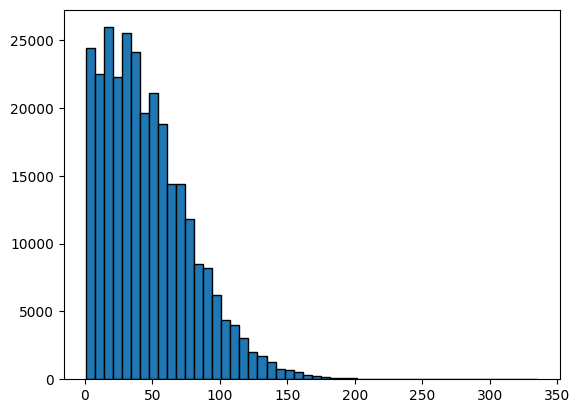

In [ ]:
import matplotlib.pyplot as plt

df['token_len'] = df['SpeechText'].apply(lambda x: len(x.split()))
plt.hist(df['token_len'], bins=50, edgecolor='black')

This is the stage where we could think about data to combine it with. Such as GDP, or other factors that might influence polarization.

Text Preprocessing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
punct = set(string.punctuation)
stop_words = set(stopwords.words('german'))


def preprocess_text(text):
    if text is None:
        return None

    text = text.replace("-", " ").replace("/", " ")
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in party_names]
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if token not in punct]
    tokens = [token for token in tokens if not token.isdigit()]
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

def preprocess_df(df):
    df['tokens'] = df['SpeechText'].apply(preprocess_text)
    return df

 # Now that I fixed the reading in it takes significantly longer to preprocess....

In [ ]:
#subset_df = df.head(1000) # tried it with a subset first as it takes really long (around 11 minutes for 10,000 rows) we might need to do this locally on a faster machine.
preprocess_df(df)

In [ ]:
#df.to_pickle('BT19.pkl')

NameError: ignored

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Deep Group/preprocessed/BT19.pkl')

In [ ]:
df.head()

,Number,What,Description,Speaker,SpeakerNumber,SpeechText,Party,Role,ParliamentaryGroup,SessionNo,LegislativePeriod,Interjections,Date,year,month,tokens
2,2,resolution,Beschlussfassung über die,Carsten Schneider,2,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,SPD,mp,SPD,1,19,15,2017-10-24,2017,10,geehrter herr präsident geehrte kolleginnen ko...
4,2,resolution,Beschlussfassung über die,Bernd Baumann,3,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,AfD,mp,AfD,1,19,14,2017-10-24,2017,10,geehrter herr präsident geehrte kolleginnen ko...
6,2,resolution,Beschlussfassung über die,Jan Korte,4,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,DIE LINKE,mp,DIE LINKE,1,19,8,2017-10-24,2017,10,geehrter herr präsident geehrte kolleginnen ko...
8,2,resolution,Beschlussfassung über die,Michael Grosse-Brömer,5,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,CDU,mp,CDU/CSU,1,19,17,2017-10-24,2017,10,geehrter herr präsident geehrte kolleginnen ko...
10,2,resolution,Beschlussfassung über die,Marco Buschmann,6,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,FDP,mp,FDP,1,19,11,2017-10-24,2017,10,geehrter herr präsident geehrte kolleginnen ko...


(array([3.829e+03, 5.458e+03, 5.595e+03, 5.574e+03, 4.466e+03, 3.318e+03,
        2.847e+03, 2.381e+03, 1.630e+03, 1.001e+03, 6.820e+02, 4.280e+02,
        2.330e+02, 1.410e+02, 9.900e+01, 6.200e+01, 4.600e+01, 3.300e+01,
        2.500e+01, 9.000e+00, 1.600e+01, 1.300e+01, 2.000e+01, 1.000e+01,
        1.200e+01, 4.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([1.000000e+00, 5.762200e+02, 1.151440e+03, 1.726660e+03,
        2.301880e+03, 2.877100e+03, 3.452320e+03, 4.027540e+03,
        4.602760e+03, 5.177980e+03, 5.753200e+03, 6.328420e+03,
        6.903640e+03, 7.478860e+03, 8.054080e+03, 8.629300e+03,
        9.204520e+03, 9.779740e+03, 1.035496e+04, 1.093018e+04,
        1.150540e+04, 1.208062e+04, 1.265584e+04, 1.3231

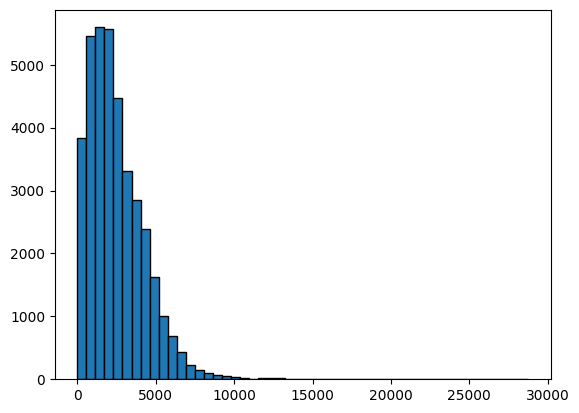

In [ ]:
import matplotlib.pyplot as plt

df['token_len'] = df['tokens'].apply(lambda x: len(x.split()))
plt.hist(df['token_len'], bins=50, edgecolor='black')

##### Done with xml files dowlnodasd and saved as pickle. #####

In [ ]:
# Take only one year out and cut token lenght to 512

df = df[df['year']==2018]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10094 entries, 1195 to 21323
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Number              10094 non-null  object        
 1   What                10094 non-null  object        
 2   Description         10094 non-null  object        
 3   Speaker             10094 non-null  object        
 4   SpeakerNumber       10094 non-null  int64         
 5   SpeechText          10094 non-null  object        
 6   Party               10094 non-null  object        
 7   Role                10094 non-null  object        
 8   ParliamentaryGroup  10094 non-null  object        
 9   SessionNo           10094 non-null  object        
 10  LegislativePeriod   10094 non-null  object        
 11  Interjections       10094 non-null  int64         
 12  Date                10094 non-null  datetime64[ns]
 13  year                10094 non-null  int32  

(array([5.800e+01, 5.000e+00, 9.000e+00, 8.000e+00, 6.000e+00, 4.000e+00,
        1.000e+01, 5.000e+00, 1.500e+01, 1.700e+01, 7.000e+00, 1.100e+01,
        1.900e+01, 1.600e+01, 1.900e+01, 1.200e+01, 1.900e+01, 2.900e+01,
        3.200e+01, 3.300e+01, 3.000e+01, 2.000e+01, 2.800e+01, 1.800e+01,
        2.100e+01, 2.600e+01, 1.700e+01, 2.000e+01, 2.700e+01, 2.100e+01,
        2.500e+01, 1.600e+01, 1.900e+01, 3.000e+01, 1.300e+01, 1.800e+01,
        2.000e+01, 1.700e+01, 2.500e+01, 2.100e+01, 1.900e+01, 2.400e+01,
        2.000e+01, 2.000e+01, 1.600e+01, 1.600e+01, 1.500e+01, 1.700e+01,
        2.400e+01, 9.157e+03]),
 array([  0.  ,  10.24,  20.48,  30.72,  40.96,  51.2 ,  61.44,  71.68,
         81.92,  92.16, 102.4 , 112.64, 122.88, 133.12, 143.36, 153.6 ,
        163.84, 174.08, 184.32, 194.56, 204.8 , 215.04, 225.28, 235.52,
        245.76, 256.  , 266.24, 276.48, 286.72, 296.96, 307.2 , 317.44,
        327.68, 337.92, 348.16, 358.4 , 368.64, 378.88, 389.12, 399.36,
        409.6 , 

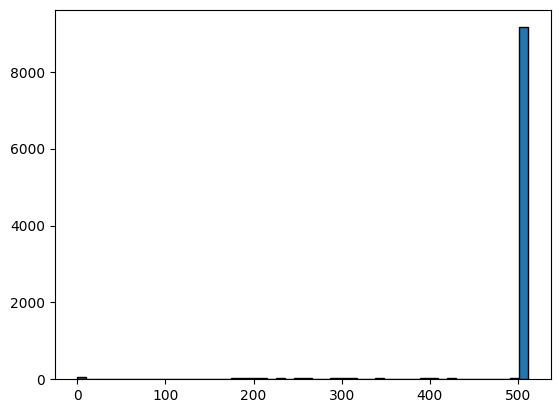

In [ ]:
def cut_tokens(tokens):
    token_list = tokens.split()  # Split the sentence into individual tokens
    return ' '.join(token_list[100:612])  # Join the selected tokens back into a string

# Apply the function to the 'tokens' column
df['tokens_cut'] = df['tokens'].apply(cut_tokens)

df['token_len'] = df['tokens_cut'].apply(lambda x: len(x.split()))
plt.hist(df['token_len'], bins=50, edgecolor='black')

In [ ]:
df.to_pickle('19_2_cut.pkl')

In [ ]:
# Some additional stuff from the course notebook
# Count the occurrences of words
word_counts = Counter(df['tokens'].split())

# Remove words that have less than three occurences
filtered_words = [word for word in df['tokens'].split() if word_counts[word] > 2]

from collections import Counter# I slightly adapted this below to make it work with the current preprocessing function

AttributeError: ignored

In [ ]:
from collections import Counter
import numpy as np

def count_word_occurrences(corpus):
    all_words = [word for speech_text in corpus for word in speech_text.split()]
    word_counts = Counter(all_words)

    return word_counts

# Assuming you have already preprocessed your DataFrame and have a "tokens" column
corpus = df['tokens'].tolist()

# Count the occurrences of words in the corpus
word_counts = count_word_occurrences(corpus)

# Filter out words with less than three occurrences
filtered_words = {word: count for word, count in word_counts.items() if count > 2}
common_words = list(filtered_words.keys())

In [ ]:
common_words

['sitzung',
 'eröffnet',
 'nehmen',
 'augenblick',
 'platz',
 'liebe',
 'kolleginnen',
 'kollegen',
 'begrüße',
 'unserer',
 'ersten',
 'weihnachtspause',
 'bekräftige',
 'guten',
 'wünsche',
 'neue',
 'jahr',
 'untereinander',
 'ausgetauscht',
 'gleich',
 'beginn',
 'bitten',
 'plätzen',
 'erheben',
 'damen',
 'herren',
 'verehrte',
 'gäste',
 'heute',
 'nachmittag',
 'bundestag',
 'aktuelle',
 'lage',
 'nahen',
 'mittleren',
 'osten',
 'debattieren',
 'tun',
 'eindruck',
 'brutalen',
 'selbstmordanschlags',
 'fanatischer',
 'attentäter',
 'mindestens',
 'elf',
 'unschuldige',
 'menschen',
 'tod',
 'gerissen',
 'darunter',
 'neun',
 'deutsche',
 'teil',
 'reisegruppe',
 'städte',
 'kultur',
 'kennenlernen',
 'wollten',
 'trauern',
 'fühlen',
 'angehörigen',
 'opfer',
 'denken',
 'vielen',
 'schwer',
 'verletzten',
 'denen',
 'leben',
 'kämpfen',
 'vergewissern',
 'behörden',
 'türkei',
 'unterstützung',
 'aufklärung',
 'hintergründe',
 'feigen',
 'anschlags',
 'bosporus',
 'begegnen',

20 most frequent words:
'geehrter': 72839,
         'herr': 648137,
         'präsident': 213254,
         'geehrte': 71724,
         'kolleginnen': 228759,
         'kollegen': 316354,
         'heutigen': 15754,
         'konstituierung': 226,
         'nimmt': 16501,
         'deutsche': 96033,
         'bundestag': 82951,
         'mal': 224579,
         'arbeit': 92209,
         'wichtigste': 6702,
         'institution': 3097,
         'parlamentarismus': 1245,
         'deutschland': 345670,
         'zugleich': 8792,
         'herzkammer': 357,
         'unserer': 120239,

In [ ]:
# Create a vocabulary of unique words
words = np.unique(common_words)
word_to_index = {word: i for i, word in enumerate(words)}
index_to_word = {i: word for i, word in enumerate(words)}

# Convert the text data to a sequence of word indices
word_indices = [word_to_index[word] for word in filtered_words]
#word_indices